In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

---

# Đọc dữ liệu

In [2]:
movies_df = pd.read_csv("Data/IMDb movies.csv")
movies_df.head(2)

/home/wiuy/anaconda3/envs/p4ds-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


---

# Khám phá & tiền xử lý dữ liệu

### Số dòng, cột của dữ liệu:

In [3]:
movies_df.shape

(85855, 22)

### Kiểm tra có dòng nào bị lặp không

In [4]:
sum(movies_df.duplicated())

0

### Mô tả dữ liệu 

| Tên cột | Ý nghĩa của cột | 
|:---------|:-----------------|
| ***imdb_title_id*** | ID phim trên trang IMDb |
| ***title*** | tên phim |
| ***original_title*** | tên gốc của phim |
| ***year*** | năm phát hành (4 chữ số) |
| ***date_published*** | ngày phát hành |
| ***genre*** | thể loại phim (1 phim có thể thuộc nhiều thể loại) |
| ***duration*** | thời lượng phim (phút)|
| ***country*** | quốc gia của phim |
| ***language*** | ngôn ngữ sử dụng trong phim |
| ***director*** | tên đạo diễn |
| ***writer*** | tên biên kịch |
| ***production_company*** | tên công ty sản xuất |
| ***actors*** | diễn viên |
| ***description*** | mô tả phim |
| ***avg_vote*** | điểm đánh giá trung bình (thang 10) |
| ***votes*** | số lượng đánh giá |
| ***budget*** | kinh phí làm phim (đơn vị tiền tệ không đồng nhất) |
| ***usa_gross_income*** | tổng doanh thu tại Mỹ (đô la Mỹ) |
| ***worlwide_gross_income*** | tổng doanh thu trên toàn thế giới (đô la Mỹ) |
| ***metascore*** $^{(*)}$ | đánh giá của những người có chuyên môn (thang 100) |
| ***reviews_from_users*** | số lượng review từ người dùng |
| ***reviews_from_critics*** | số lượng review từ nhà phê bình |

(\*): ***metascore*** lấy từ trang https://www.metacritic.com/, 2 cột ***reviews_from_users*** và ***reviews_from_critics*** sẽ ứng với các review trên trang này

### Kiểm tra kiểu dữ liệu của các cột

In [5]:
movies_df.dtypes

imdb_title_id             object
title                     object
original_title            object
year                      object
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
dtype: object

**Dựa vào mô tả thì có các cột cần có sự điều chỉnh về kiểu dữ liệu:**
- Các cột ***year, budget, usa_gross_income, worlwide_gross_income*** nên được đưa về các kiểu `numeric`.
- Cột ***date_published*** cần được đưa về kiểu `datetime`

### Kiểm tra tỷ lệ thiếu dữ liệu của các cột

- Vì nhìn qua thì có các cột bị thiếu rất nhiều nên cần kiểm tra để loại bỏ nếu không thực sự cần thiết

In [6]:
def missing_ratio(s):
    num_missing_val = s.isnull().sum()
    return num_missing_val/len(s)*100

In [7]:
movies_df.agg(missing_ratio)

imdb_title_id             0.000000
title                     0.000000
original_title            0.000000
year                      0.000000
date_published            0.000000
genre                     0.000000
duration                  0.000000
country                   0.074544
language                  0.970241
director                  0.101334
writer                    1.830994
production_company        5.188981
actors                    0.080368
description               2.463456
avg_vote                  0.000000
votes                     0.000000
budget                   72.383670
usa_gross_income         82.148972
worlwide_gross_income    63.873974
metascore                84.502941
reviews_from_users        8.848640
reviews_from_critics     13.740609
dtype: float64

- Bỏ đi các cột thiếu hơn 50% dữ liệu: ***budget, usa_gross_income, worlwide_gross_income, metascore***
- Do bỏ cột ***metascore*** nên sẽ bỏ luôn hai cột bổ sung thông tin cho cột này là: ***reviews_from_users, reviews_from_critics***

In [8]:
movies_df = movies_df.drop(columns=['budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore', 'reviews_from_users', 'reviews_from_critics'])

### Điều chỉnh kiểu dữ liệu cho phù hợp cho các cột

- Do đã bỏ đi một số cột nên còn lại 2 cột ***year*** và ***date_published*** là cần điều chỉnh

**Điều chỉnh cột year:**
- Có một warning khi đọc dữ liệu là cột ***year*** có kiểu dữ liệu hỗn hợp nên trước tiên sẽ là kiểm tra xem cột ***year*** có các kiểu dữ liệu gì

In [9]:
set(movies_df.year.apply(type))

{int, str}

- Ngoài kiểu `int` là hợp lý ***year*** thì còn kiểu `str` cần phải chỉnh sửa, sao khi thử chuyển thì báo lỗi

`Unable to parse string "TV Movie 2019" at position 83917`

- Nên xóa dòng mà cột ***year*** nhận giá trị "TV Movie 2019" rồi mới chuyển về dạng `numeric`

In [10]:
movies_df = movies_df[movies_df.date_published != 'TV Movie 2019']
movies_df.year = pd.to_numeric(movies_df.year)
movies_df.year.dtypes

dtype('int64')

**Điều chỉnh cột *date_published* về dạng `datetime`**

- Trước khi điều chỉnh kiểu dữ liệu thì có một vấn đề cần xử lý với cột ***date_published*** đó là có các giá trị chỉ có năm không có ngày tháng 

In [11]:
movies_df.date_published[movies_df.date_published.apply(lambda x: '-' not in str(x))].head()

5      1913
55     1915
100    1919
117    1919
144    1922
Name: date_published, dtype: object

- Bỏ các cột này trước khi chuyển về dạng `datetime`, mặc dù không bỏ thì việc chuyển vẫn không có vấn đề tuy nhiên ngày tháng sẽ mặc định là 1/1 điều này sẽ gây sai lệch nếu ta muốn khảo sát mà có sử dụng cột này.

In [12]:
movies_df = movies_df[movies_df.date_published.apply(lambda x: '-' in str(x))]

- Chuyển cột ***date_published*** về dạng `datetime`

In [13]:
movies_df.date_published = pd.to_datetime(movies_df.date_published, format='%Y-%m-%d')

In [14]:
movies_df.date_published.dtypes

dtype('<M8[ns]')

- Theo mô tả dữ liệu thì cột ***year*** phải trùng với năm ở cột ***date_published***, kiểm tra thực điều này có thực sự đúng

In [15]:
sum(movies_df.year != movies_df.date_published.dt.year)

17054

*Sai lệch rất nhiều,không biết vì sao lại có sự sai lệch này. Với sự sai lệch nhiều đến vậy thì có lẽ không phải do vấn đề nhập liệu*

- Vậy sẽ xóa cột ***year***

In [16]:
movies_df = movies_df.drop(columns=['year'])

### Xem lại dữ liệu sau khi đã điều chỉnh

**Số dòng số cột của dữ liệu**

In [17]:
movies_df.shape

(81292, 15)

**Xem lại kiểu dữ liệu của các cột**

In [18]:
movies_df.dtypes

imdb_title_id                 object
title                         object
original_title                object
date_published        datetime64[ns]
genre                         object
duration                       int64
country                       object
language                      object
director                      object
writer                        object
production_company            object
actors                        object
description                   object
avg_vote                     float64
votes                          int64
dtype: object

### Khám phá  các cột dạng numeric

- Xem xét các giá trị min max và tỷ lệ giá trị thiếu của các cột dạng numeric

In [19]:
num_cols = ['date_published', 'duration', 'avg_vote', 'votes']
movies_df[num_cols].agg([min, max, missing_ratio])

,date_published,duration,avg_vote,votes
min,1894-10-09 00:00:00,41.0,1.0,99.0
max,2021-05-07 00:00:00,808.0,9.9,2278845.0
missing_ratio,0.0,0.0,0.0,0.0


- Các cột dạng numeric không có dữ liệu thiếu
- Tiếp theo sẽ xem thử sự phân bố giá trị của các cột này, cột ***date_published*** là kiểu `datetime` nên ta không xem xét sự phân bố dữ liệu

**Phân bố giá trị của cột year**

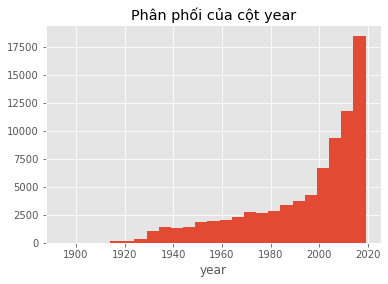

In [20]:
movies_df['date_published'].dt.year.hist(bins=np.arange(1894, 2022, 5))
plt.xlabel('year')
plt.title('Phân phối của cột year')
plt.show()

*Nhận xét: số lượng phim luôn tăng qua các năm và có xu hướng tăng mạnh hơn qua từng năm. Và năm 2021 tất nhiên sẽ có rất ít phim*

**Phân bố giá trị của cột duration**

Các giá trị trên 200 là quá ít nên bin cuối là 200

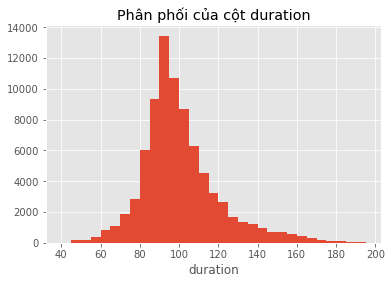

In [21]:
movies_df['duration'].hist(bins=np.arange(40, 200, 5))
plt.xlabel('duration')
plt.title('Phân phối của cột duration')
plt.show()

*Nhận xét: thời lượng các bộ phim chủ yếu trong khoảng từ 80-120 phút*

**Phân bố giá trị của cột avg_vote**

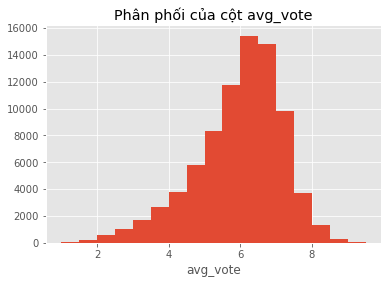

In [22]:
movies_df['avg_vote'].hist(bins=np.arange(1, 10, 0.5))
plt.xlabel('avg_vote')
plt.title('Phân phối của cột avg_vote')
plt.show()

*Nhận xét: đa số các phim được đánh giá ở mức 5-7, rất ít phim có thể đạt được 9-10 (không có phim nào đạt được đánh gái 10 tuyệt đối)*

**Phân bố giá trị của cột votes**

Các giá trị trên 6000 là quá ít nên bin cuối là 6000

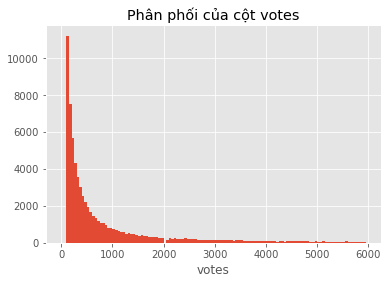

In [23]:
movies_df['votes'].hist(bins=np.arange(0, 6000, 50))
plt.xlabel('votes')
plt.title('Phân phối của cột votes')
plt.show()

### Khám phá  các cột dạng categorical

- Đầu tiên xem xét các giá trị sau của các cột categorical: tỷ lệ giá trị thiếu, số lượng các giá trị phân biệt (`num_diff_vals`), các gái trị phân biệt (`diff_vals`)

In [24]:
cate_cols = list(set(movies_df.columns) - set(num_cols))
def num_diff_vals(s):
    return s.nunique()
def diff_vals(s):
    return s.unique()

movies_df[cate_cols].agg([missing_ratio, num_diff_vals, diff_vals])

,original_title,actors,genre,production_company,country,language,imdb_title_id,director,writer,description,title
missing_ratio,0.0,0.072578,0.0,4.542882,0.071348,0.943512,0.0,0.098411,1.631157,2.30527,0.0
num_diff_vals,76680,81179,1234,30598,4826,4299,81292,33272,63954,79296,77845
diff_vals,"[Miss Jerry, The Story of the Kelly Gang, Den ...","[Blanche Bayliss, William Courtenay, Chauncey ...","[Romance, Biography, Crime, Drama, Drama, Dram...","[Alexander Black Photoplays, J. and N. Tait, F...","[USA, Australia, Germany, Denmark, Italy, Germ...","[None, nan, English, Italian, German, Danish, ...","[tt0000009, tt0000574, tt0001892, tt0002101, t...","[Alexander Black, Charles Tait, Urban Gad, Cha...","[Alexander Black, Charles Tait, Urban Gad, Geb...",[The adventures of a female reporter in the 18...,"[Miss Jerry, The Story of the Kelly Gang, Den ..."


*Cột imdb_title_id có số lượng giá trị khác nhau đúng với số dòng dữ liệu: 85854 dòng*

- Tiếp theo tìm các giá trị xuất hiện nhiều nhất của các cột ***genre, production_company, country, language, actors, director, writer***.
- Do mỗi mẫu của các cột này có thể có nhiều giá trị nên cần phải xử lý tách các giá trị này ra trước rồi mới tính tần xuất của từng giá trị. Hàm `count_list_cols` sẽ thực hiện việc tách và sau đó tính tần xuất bằng phương thức `value_counts`

In [25]:
def count_list_cols(s):
    return s.str.replace(' ', '').str.split(',').explode().value_counts()
def top_vals(s, n):
    freq = count_list_cols(s)
    return list(freq[:n].index)

movies_df[['genre', 'production_company', 'country', 'language', 'actors', 'director', 'writer']].agg(lambda s: top_vals(s, 5))

,genre,production_company,country,language,actors,director,writer
0,Drama,Metro-Goldwyn-Mayer(MGM),USA,English,Brahmanandam,MichaelCurtiz,JingWong
1,Comedy,WarnerBros.,France,French,AnupamKher,JesúsFranco,KuangNi
2,Romance,ColumbiaPictures,UK,Spanish,EricRoberts,LesleySelander,WilliamShakespeare
3,Action,ParamountPictures,India,Italian,Nassar,RichardThorpe,JesúsFranco
4,Thriller,TwentiethCenturyFox,Italy,German,PrakashRaj,JohnFord,RobinBhatt


- Trực quan tần xuất của các giá trị xuất hiện nhiều nhất của các cột ***genre, production_company, country, language***

**Tần xuất của 10 giá trị xuất hiện nhiều nhất của cột genre**

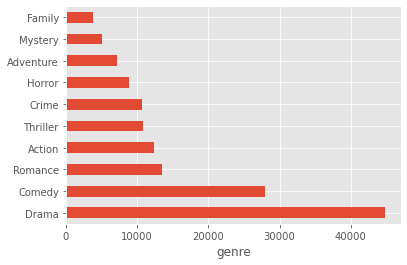

In [26]:
count_list_cols(movies_df.genre)[:10].plot.barh()
plt.xlabel('genre')
plt.show()

**Tần xuất của 10 giá trị xuất hiện nhiều nhất của cột production_company**

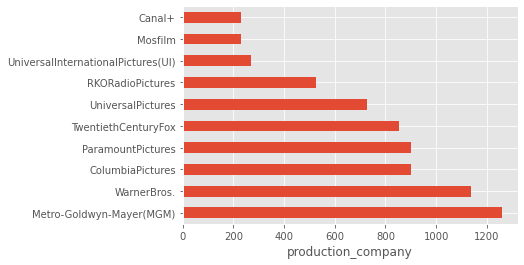

In [27]:
count_list_cols(movies_df.production_company)[:10].plot.barh()
plt.xlabel('production_company')
plt.show()

**Tần xuất của 10 giá trị xuất hiện nhiều nhất của cột country**

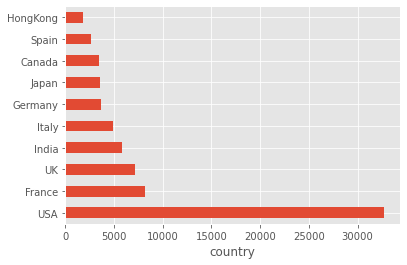

In [28]:
count_list_cols(movies_df.country)[:10].plot.barh()
plt.xlabel('country')
plt.show()

**Tần xuất của 10 giá trị xuất hiện nhiều nhất của cột genre**

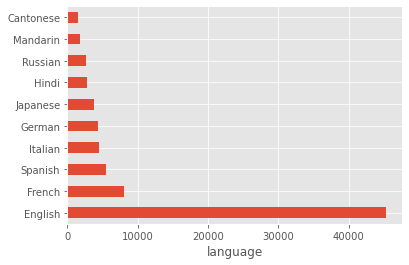

In [29]:
count_list_cols(movies_df.language)[:10].plot.barh()
plt.xlabel('language')
plt.show()

*Tần xuất của giá trị **USA** trong cột **country** và **English** trong cột **languge** vượt trội hoàn toàn so với các giá trị còn lại, điều này không quá bất ngờ đối với ngành công nghiệp phim ảnh*

- Xem thử với các phim tiếng Anh (không cần xét USA vì phim ở USA sẽ bao gồm trong phim tiếng Anh) thì các giá trị xuất hiện nhiều nhất của các cột ***actors, director, writer*** sẽ như thế nào.
- Tạo `Eng_df` gồm các phim tiếng Anh (có thể có các thứ tiếng khác) để sử dụng cho các phần sau

In [30]:
Eng_df = movies_df[movies_df.language.apply(lambda x: 'English' in str(x))]

In [31]:
Eng_df[['actors', 'director', 'writer']].agg(lambda s: top_vals(s, 5))

,actors,director,writer
0,EricRoberts,MichaelCurtiz,WilliamShakespeare
1,JohnCarradine,LesleySelander,RobertE.Kent
2,HenryO'Neill,RichardThorpe,BenHecht
3,MichaelMadsen,WilliamBeaudine,WoodyAllen
4,JohnWayne,JohnFord,StephenKing


*Các phim tiếng Anh mặt dù chiếm đa số nhưng không vì vậy mà các giá trị **actors, director, writer** của các phim tiếng Anh sẽ chiếm đa số theo*

---

# Đặt câu hỏi